In [62]:
import pandas as pd

print("Pandas version:", pd.__version__)


Pandas version: 2.2.1


In [63]:
import sklearn

print("Scikit-learn version:", sklearn.__version__)


Scikit-learn version: 1.4.1.post1


In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [65]:
users = pd.read_csv('/Users/rajendraacharya/Desktop/Python/Book_Recommendation/Book_Recommendation_System_Regression_model/DataSet/Users.csv')
books = pd.read_csv('/Users/rajendraacharya/Desktop/Python/Book_Recommendation/Book_Recommendation_System_Regression_model/DataSet/Books.csv')
ratings = pd.read_csv('/Users/rajendraacharya/Desktop/Python/Book_Recommendation/Book_Recommendation_System_Regression_model/DataSet/Ratings.csv')

/var/folders/_h/_cdgscbx2v92f_xzhzlxnq2w0000gn/T/ipykernel_25278/601756676.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('/Users/rajendraacharya/Desktop/Python/Book_Recommendation/Book_Recommendation_System_Regression_model/DataSet/Books.csv')


In [66]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


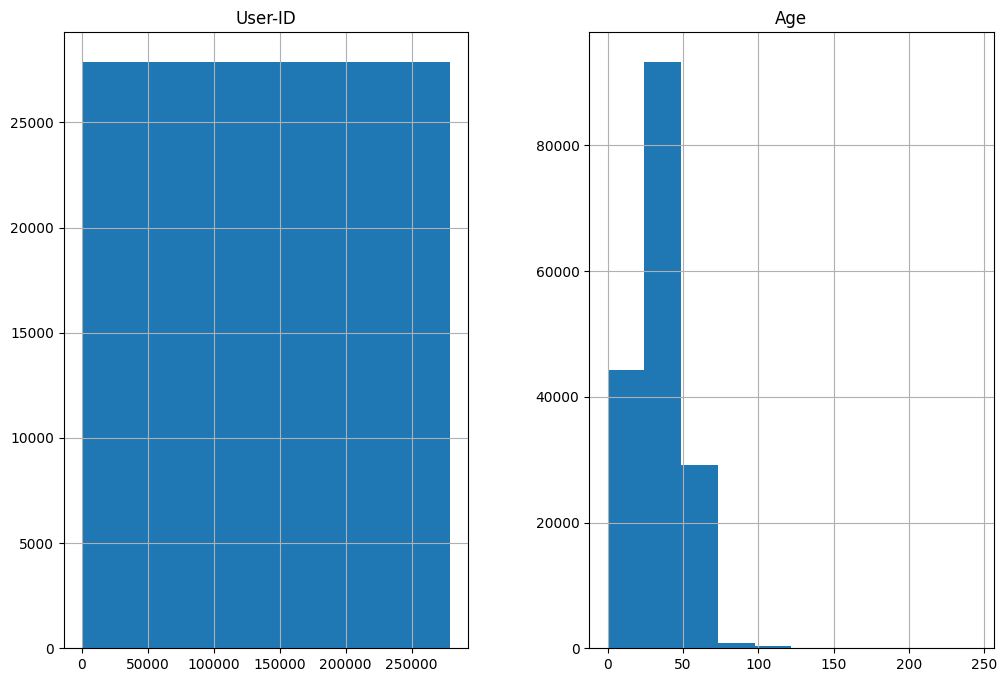

In [67]:
users.hist(figsize=(12, 8))
plt.show()

In [68]:
#filtering / data cleaning some methods
# Display the count of missing values in each column
users.isnull().sum()


User-ID          0
Location         0
Age         110762
dtype: int64

In [69]:
# Impute missing values with the mean, median, or mode
users['Age'].fillna(users['Age'].mean(), inplace=True)


/var/folders/_h/_cdgscbx2v92f_xzhzlxnq2w0000gn/T/ipykernel_25278/3162258649.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  users['Age'].fillna(users['Age'].mean(), inplace=True)


In [70]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [71]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [72]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [73]:
users.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
278853    False
278854    False
278855    False
278856    False
278857    False
Length: 278858, dtype: bool

In [74]:
users.drop_duplicates(inplace=True)

In [75]:
books.drop_duplicates(inplace=True)

In [76]:
ratings.drop_duplicates(inplace=True)

In [77]:
books.describe()
# ratings.describe()
# users.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/185326119X.0...,http://images.amazon.com/images/P/225307649X.0...
freq,1,27,632,13903,7535,2,2,2


In [78]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [79]:
books.rename(columns={' ': 'Book_Id'}, inplace=True)

In [80]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [81]:
print("Books DataFrame:")
print(books.head())

Books DataFrame:
         ISBN                                         Book-Title  \
0  0195153448                                Classical Mythology   
1  0002005018                                       Clara Callan   
2  0060973129                               Decision in Normandy   
3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
4  0393045218                             The Mummies of Urumchi   

            Book-Author Year-Of-Publication                   Publisher  \
0    Mark P. O. Morford                2002     Oxford University Press   
1  Richard Bruce Wright                2001       HarperFlamingo Canada   
2          Carlo D'Este                1991             HarperPerennial   
3      Gina Bari Kolata                1999        Farrar Straus Giroux   
4       E. J. W. Barber                1999  W. W. Norton &amp; Company   

                                         Image-URL-S  \
0  http://images.amazon.com/images/P/0195153448.0...   
1  http://i

In [82]:
print("\nRatings DataFrame:")
print(ratings.head())


Ratings DataFrame:
   User-ID        ISBN  Book-Rating
0   276725  034545104X            0
1   276726  0155061224            5
2   276727  0446520802            0
3   276729  052165615X            3
4   276729  0521795028            6


In [83]:
print(users.head())

   User-ID                            Location        Age
0        1                  nyc, new york, usa  34.751434
1        2           stockton, california, usa  18.000000
2        3     moscow, yukon territory, russia  34.751434
3        4           porto, v.n.gaia, portugal  17.000000
4        5  farnborough, hants, united kingdom  34.751434


In [84]:
# Merge ratings and users on 'user_id'
merged_ratings_users = pd.merge(ratings, users, on='User-ID', how='inner')

In [85]:
# Merge merged_ratings_users and books on 'ISBN'
final_merged_df = pd.merge(merged_ratings_users, books, on='ISBN', how='inner')

In [86]:
final_merged_df.head()


,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,"tyler, texas, usa",34.751434,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,"seattle, washington, usa",34.751434,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,"h, new south wales, australia",16.000000,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,"rijeka, n/a, croatia",16.000000,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,"rijeka, n/a, croatia",16.000000,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [87]:
print(final_merged_df.groupby('ISBN'))

In [88]:
average_ratings = final_merged_df.groupby('ISBN')['Book-Rating'].mean().reset_index()
print(average_ratings)

              ISBN  Book-Rating
0       0000913154          8.0
1       0001010565          0.0
2       0001046438          9.0
3       0001046713          0.0
4       000104687X          6.0
...            ...          ...
270146  B000234N76          0.0
270147  B000234NC6          0.0
270148  B00029DGGO          0.0
270149  B0002JV9PY          0.0
270150  B0002K6K8O          0.0

[270151 rows x 2 columns]


In [89]:
data = pd.merge(final_merged_df, average_ratings, on='ISBN', suffixes=('', '_avg'))

In [90]:
print(data.head())

   User-ID        ISBN  Book-Rating                       Location        Age  \
0   276725  034545104X            0              tyler, texas, usa  34.751434   
1   276726  0155061224            5       seattle, washington, usa  34.751434   
2   276727  0446520802            0  h, new south wales, australia  16.000000   
3   276729  052165615X            3           rijeka, n/a, croatia  16.000000   
4   276729  0521795028            6           rijeka, n/a, croatia  16.000000   

                                          Book-Title      Book-Author  \
0                               Flesh Tones: A Novel       M. J. Rose   
1                                   Rites of Passage       Judith Rae   
2                                       The Notebook  Nicholas Sparks   
3                                     Help!: Level 1    Philip Prowse   
4  The Amsterdam Connection : Level 4 (Cambridge ...      Sue Leather   

  Year-Of-Publication                   Publisher  \
0                2002

In [98]:
from sklearn.preprocessing import LabelEncoder

# Assuming final_merged_df is your DataFrame
label_encoder = LabelEncoder()
data['ISBN'] = label_encoder.fit_transform(data['ISBN'])


In [113]:
from sklearn.preprocessing import LabelEncoder

# Assuming final_merged_df is your DataFrame
label_encoder = LabelEncoder()
data['ISBN_numeric'] = label_encoder.fit_transform(data['ISBN'])


In [114]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating_avg,ISBN_numeric
0,276725,45921,0,"tyler, texas, usa",34.751434,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2.933333,45921
1,276726,22731,5,"seattle, washington, usa",34.751434,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,2.500000,22731
2,276727,92659,0,"h, new south wales, australia",16.000000,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,4.060345,92659
3,276729,111478,3,"rijeka, n/a, croatia",16.000000,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,3.000000,111478
4,276729,111512,6,"rijeka, n/a, croatia",16.000000,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,6.000000,111512


In [115]:
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [116]:
X_train = train_data[['User-ID', 'ISBN_numeric']]
y_train = train_data['Book-Rating_avg']

In [117]:
X_test = test_data[['User-ID', 'ISBN_numeric']]
y_test = test_data['Book-Rating_avg']

In [118]:
non_numeric_values = X_train.isna()

In [120]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [121]:
# Evaluate the model
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 4.519740435192115


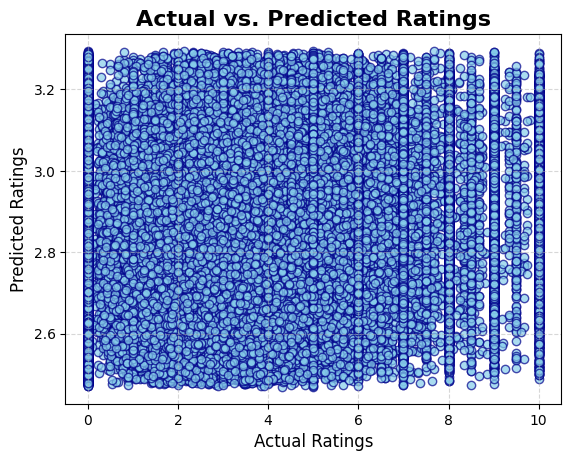

In [123]:
plt.scatter(y_test, predictions, color='skyblue', edgecolors='darkblue', alpha=0.7)
plt.xlabel('Actual Ratings', fontsize=12)
plt.ylabel('Predicted Ratings', fontsize=12)
plt.title('Actual vs. Predicted Ratings', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

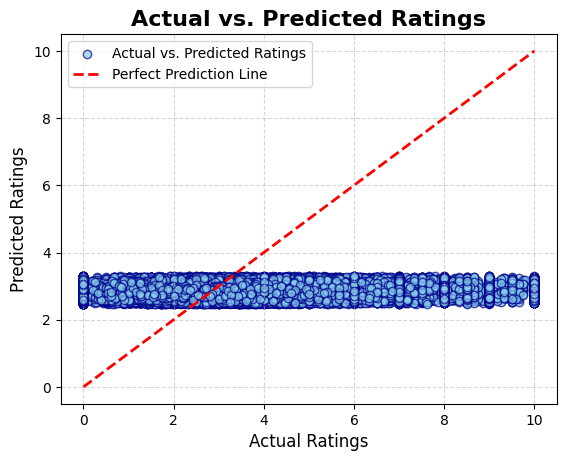

In [128]:
import matplotlib.pyplot as plt

# Scatter plot for Actual vs. Predicted Ratings
plt.scatter(y_test, predictions, color='skyblue', edgecolors='darkblue', alpha=0.7, label='Actual vs. Predicted Ratings')
plt.xlabel('Actual Ratings', fontsize=12)
plt.ylabel('Predicted Ratings', fontsize=12)
plt.title('Actual vs. Predicted Ratings', fontsize=16, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

# Adding a diagonal line for reference
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Perfect Prediction Line')
plt.legend()

plt.show()


In [139]:
data.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating_avg,ISBN_numeric
0,276725,45921,0,"tyler, texas, usa",34.751434,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2.933333,45921
1,276726,22731,5,"seattle, washington, usa",34.751434,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,2.500000,22731
2,276727,92659,0,"h, new south wales, australia",16.000000,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,4.060345,92659
3,276729,111478,3,"rijeka, n/a, croatia",16.000000,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,3.000000,111478
4,276729,111512,6,"rijeka, n/a, croatia",16.000000,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,6.000000,111512


In [140]:
is_id_column_unique = not data['ISBN_numeric'].duplicated().any()

In [141]:
is_id_column_unique

False

In [142]:
data_sorted = data.sort_values(by='ISBN_numeric')

In [143]:
data_sorted.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating_avg,ISBN_numeric
629929,171118,0,8,"toronto, ontario, canada",47.000000,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,8.0,0
774717,209516,1,0,"felixstowe, suffolk, united kingdom",57.000000,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,0.0,1
319698,86123,1,0,"peterborough, ontario, canada",34.751434,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,0.0,1
91076,23902,2,9,"london, england, united kingdom",34.751434,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,9.0,2
722613,196149,3,0,"lisburn, northern ireland, united kingdom",29.000000,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,0.0,3


In [144]:
df_unique_names = data.drop_duplicates(subset='ISBN_numeric')

In [147]:
data_sorted.head()

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Book-Rating_avg,ISBN_numeric
629929,171118,0,8,"toronto, ontario, canada",47.000000,The Way Things Work: An Illustrated Encycloped...,C. van Amerongen (translator),1967,Simon &amp; Schuster,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,http://images.amazon.com/images/P/0000913154.0...,8.0,0
774717,209516,1,0,"felixstowe, suffolk, united kingdom",57.000000,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,0.0,1
319698,86123,1,0,"peterborough, ontario, canada",34.751434,Mog's Christmas,Judith Kerr,1992,Collins,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,http://images.amazon.com/images/P/0001010565.0...,0.0,1
91076,23902,2,9,"london, england, united kingdom",34.751434,Liar,Stephen Fry,0,Harpercollins Uk,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,http://images.amazon.com/images/P/0001046438.0...,9.0,2
722613,196149,3,0,"lisburn, northern ireland, united kingdom",29.000000,Twopence to Cross the Mersey,Helen Forrester,1992,HarperCollins Publishers,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,http://images.amazon.com/images/P/0001046713.0...,0.0,3
